In [1]:
import osmnx as ox
import igraph as ig
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
import random as rd
from IPython.display import clear_output
from shapely.wkt import loads as load_wkt
import matplotlib.cm as cm
import time
import math
ox.config(log_console=True, use_cache=True)

C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\utils_geo.py:335: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


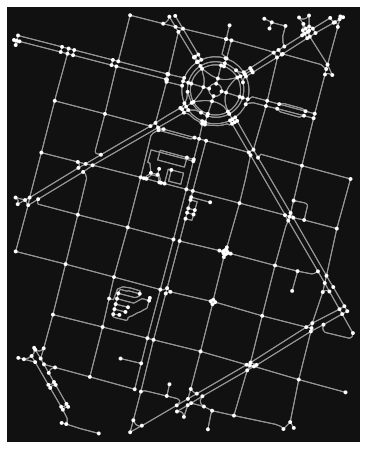

In [2]:
G = ox.graph_from_bbox(-19.9209,-19.9312,-43.9505,-43.9415,network_type='walk')

fig, ax = ox.plot_graph(G)

In [3]:
df = pd.read_excel(r'C:\Users\Vinicius Fernandes\Documents\GitHub\TCC\Testes\Teste Escala Menor\lista_enderecos_escala_menor.xlsx')
df = pd.concat([df[['enderecos']], df['coordenadas'].str.split(', ', expand=True)], axis=1)
df[0] = pd.to_numeric(df[0])
df[1] = pd.to_numeric(df[1])
df

,enderecos,0,1
0,"Avenida Augusto de Lima, 744, Centro",-19.922607,-43.942935
1,"Avenida Olegário Maciel, 1600, Lourdes",-19.927987,-43.947409
2,"Rua Gonçalves Dias, 2001, Lourdes",-19.929672,-43.943978
3,"Rua São Paulo, 1918, Lourdes",-19.930259,-43.943316
4,"Avenida Bias Fortes, 799, Lourdes",-19.926656,-43.942923
5,"Rua dos Timbiras, 2459, Santo Agostinho",-19.925280,-43.946140
6,"AV AUGUSTO DE LIMA, 876, CENTRO",-19.922865,-43.944002
7,"R. Gonçalves Dias, 2700, Santo Agostinho",-19.927839,-43.949675


In [ ]:
#nao usar, tem outro metodo
nodes_araujos = []
nodes_araujos_completos = []

for i in range(len(df)):
    coordenada_lat = df.loc[i,0]
    coordenada_long = df.loc[i,1]
    location_point = (coordenada_lat,coordenada_long)
    origin_node = ox.get_nearest_node(G, location_point)
    nodes_araujos.append(origin_node)
    nodes_araujos_completos.append([origin_node,G.nodes[origin_node]['y'],G.nodes[origin_node]['x']])

In [ ]:
nodes_araujos

In [ ]:
nodes_araujos_completos

In [4]:
#encontrando o nó mais próximo
nodes_araujos = []
nodes_araujos_completos = []

for i in range(len(df)):
    coordenada_lat = df.loc[i,0]
    coordenada_long = df.loc[i,1]
    distancia_node = 99999999999999
    for node_teste in G.nodes:
        coordenada_lat_teste = G.nodes[node_teste]['y']
        coordenada_long_teste = G.nodes[node_teste]['x']
        new_distancia_node = ((coordenada_lat-coordenada_lat_teste)**2 + (coordenada_long-coordenada_long_teste)**2)**(1/2)
        if new_distancia_node < distancia_node:
            distancia_node = new_distancia_node
            origin_node = node_teste
    
    nodes_araujos.append(origin_node)
    nodes_araujos_completos.append([origin_node,G.nodes[origin_node]['y'],G.nodes[origin_node]['x']])

In [5]:
nodes_araujos_completos

[[8920610408, -19.923268, -43.9427943],
 [6918856501, -19.928073, -43.947422],
 [8934295040, -19.9294866, -43.9440715],
 [29095398, -19.9298466, -43.9429702],
 [8979229854, -19.9271885, -43.9430018],
 [41416532, -19.9251819, -43.9459011],
 [28800979, -19.9230126, -43.943793],
 [60649429, -19.9282539, -43.9493794]]

In [6]:
nodes, edges = ox.graph_to_gdfs(G, nodes=True, edges=True)  # Transforms nodes and edges into Geodataframes

nodes['menor_distancia_para_araujo'] = 0
nodes['araujo_mais_proxima'] = 0
route_lengths = []


In [ ]:
nodes

In [ ]:
edges

In [7]:
edges_list = list(G.edges)
edges_list

[(27563807, 2388312351, 0),
 (27563807, 5041851257, 0),
 (27563807, 5209322507, 0),
 (27563808, 1288421458, 0),
 (27563808, 8934202538, 0),
 (27563808, 5041851253, 0),
 (28635039, 993654857, 0),
 (28635039, 35968161, 0),
 (28635039, 41416519, 0),
 (28800978, 8427322986, 0),
 (28800978, 993654834, 0),
 (28800978, 8979076648, 0),
 (28800979, 993654844, 0),
 (28800979, 8920746331, 0),
 (28800979, 2388312354, 0),
 (28800979, 32448886, 0),
 (28801012, 35968156, 0),
 (28801012, 35968157, 0),
 (28801012, 50923643, 0),
 (28801012, 35968158, 0),
 (28801013, 324773873, 0),
 (28801013, 8979229851, 0),
 (28801013, 35968155, 0),
 (28801018, 8933734968, 0),
 (28801018, 35927223, 0),
 (28801018, 29096795, 0),
 (28801018, 2827361001, 0),
 (29095398, 2316604343, 0),
 (29095398, 36417198, 0),
 (29095398, 2887596101, 0),
 (29095398, 2887576701, 0),
 (29095780, 36417196, 0),
 (29095780, 36417198, 0),
 (29095780, 36417197, 0),
 (29096295, 2316604343, 0),
 (29096295, 60649414, 0),
 (29096535, 35927090, 0),


In [8]:
#montando grafo para breadth search

graph_breadth_search = {}

for node_index_graph in range(len(edges_list)):
    try:
        graph_breadth_search[edges_list[node_index_graph][0]].append(edges_list[node_index_graph][1])
    except AttributeError:
        graph_breadth_search[edges_list[node_index_graph][0]] = [edges_list[node_index_graph][1]]
    except KeyError:
        graph_breadth_search[edges_list[node_index_graph][0]] = [edges_list[node_index_graph][1]]

In [ ]:
graph_breadth_search

In [ ]:
def bfs(graph, start, end):
    # maintain a queue of paths
    queue = []
    # push the first path into the queue
    queue.append([start])
    #count = 0
    while queue:
        #print('queue',queue)
        # get the first path from the queue
        path = queue.pop(0)
        #print('path',path)
        # get the last node from the path
        node = path[-1]
        #print('node',node)
        # path found
        if node == end:
            return path
        # enumerate all adjacent nodes, construct a 
        # new path and push it into the queue
        for adjacent in graph.get(node, []):
            #print('adjacent',adjacent)
            new_path = list(path)
            new_path.append(adjacent)
            queue.append(new_path)
        #print('queue',queue)
        #count += 1
        #print(count)

In [ ]:
bfs(graph_breadth_search, 27563807, 60649313)

In [ ]:
#aplicando breadth search

for node_index_breadth_search in range(len(node_araujos_busca)):
    start_time = time.time()
    
    node = node_araujos_busca[node_index_breadth_search][0]
    
    route_length = 99999999999999
    
    for araujo_index in range(len(node_araujos_busca[node_index_breadth_search][1])):
        araujo = node_araujos_busca[node_index_breadth_search][1][araujo_index]
        
        
        path_breadth_search = bfs(graph_breadth_search, node, araujo)

        
        total_lenght_breadth_search = 0
        for index_path_breadth_search in range(len(path_breadth_search)-1):
            lenght_node = graph_djikstra[path_breadth_search[index_path_breadth_search]][path_breadth_search[index_path_breadth_search+1]]
            total_lenght_breadth_search += lenght_node
            
        #print(total_lenght_astar)
        
        if total_lenght_breadth_search < route_length:
            route_length = total_lenght_breadth_search
            araujo_proxima = araujo
            
            
    nodes['menor_distancia_para_araujo'][node] = route_length
    nodes['araujo_mais_proxima'][node] = araujo_proxima
        
    
    #print('\n\n\n')


    print("--- %s seconds ---" % (time.time() - start_time))

In [9]:
#montando grafo para djikstra

graph_djikstra = {}
appended = []
node_analise = 0

for node_index_graph in range(len(edges_list)):

    node_to_append = edges_list[node_index_graph][0]
    length = G[edges_list[node_index_graph][0]][edges_list[node_index_graph][1]][0]['length']
    #print(node_to_append,node_analise)
    if node_to_append != node_analise:
        #se for diferente, vai criar uma nova dash table dentro do grafo
        graph_djikstra[edges_list[node_index_graph][0]] = {}
        graph_djikstra[edges_list[node_index_graph][0]][edges_list[node_index_graph][1]] = length
        node_analise = node_to_append
        #print('novo nó')
    else:
        graph_djikstra[edges_list[node_index_graph][0]][edges_list[node_index_graph][1]] = length
        #print('velho nó')

    
graph_djikstra

{27563807: {2388312351: 3.109,
  5041851257: 15.519,
  5209322507: 55.88199999999999},
 27563808: {1288421458: 8.978,
  8934202538: 46.40599999999999,
  5041851253: 10.949},
 28635039: {993654857: 19.918, 35968161: 120.691, 41416519: 141.51},
 28800978: {8427322986: 0.926, 993654834: 14.517, 8979076648: 38.652},
 28800979: {993654844: 14.801,
  8920746331: 33.951,
  2388312354: 55.99700000000001,
  32448886: 121.116},
 28801012: {35968156: 11.284,
  35968157: 10.194,
  50923643: 13.329,
  35968158: 10.49},
 28801013: {324773873: 140.323, 8979229851: 92.02, 35968155: 131.462},
 28801018: {8933734968: 130.543,
  35927223: 17.13,
  29096795: 132.028,
  2827361001: 145.257},
 29095398: {2316604343: 118.047,
  36417198: 135.408,
  2887596101: 132.064,
  2887576701: 127.285},
 29095780: {36417196: 13.773, 36417198: 9.093, 36417197: 14.64},
 29096295: {2316604343: 26.473, 60649414: 141.478},
 29096535: {35927090: 12.725, 8920610408: 26.054, 2828780801: 110.329},
 29096580: {29096742: 141.684,

In [10]:
#encontrando as 3 araujos mais proximas
node_araujos_busca = []
step = 0.0005
start_time = time.time()
for node in G.nodes:
    
    
    #print(node)
    
    araujos_busca = []
    
    n_step = 1
        
    while len(araujos_busca) < 3:
        
        #print(n_step)
        
        for index_node_araujo in range(len(nodes_araujos_completos)):
            
            try:
            
                y_mais = G.nodes[node]['y'] + (n_step * step)
                y_menos = G.nodes[node]['y'] - (n_step * step)
                x_mais = G.nodes[node]['x'] + (n_step * step)
                x_menos = G.nodes[node]['x'] - (n_step * step)


                y_teste = nodes_araujos_completos[index_node_araujo][1]
                x_teste = nodes_araujos_completos[index_node_araujo][2]

                if y_teste<y_mais and y_teste>y_menos and x_teste<x_mais and x_teste>x_menos and nodes_araujos_completos[index_node_araujo][0] not in araujos_busca:
                    araujos_busca.append(nodes_araujos_completos[index_node_araujo][0])

                    #print('chegou aqui e tirou pop')
                    
            except IndexError:
                break
        
        #print(araujos_busca,' - ',len(araujos_busca))
        
        
        n_step += 1
        
        
    node_araujos_busca.append([node,araujos_busca])
print("--- %s seconds ---" % (time.time() - start_time))
    #print(node_araujos_busca)
    #print('\n','\n')

--- 0.06654024124145508 seconds ---


In [ ]:
#calculando os valores heuristicos para cada araujo

valores_heuristicos = {}

for node_araujo in range(len(nodes_araujos_completos)):
    
    valores_heuristicos[nodes_araujos_completos[node_araujo][0]] = {}
    lat_node_araujo = nodes_araujos_completos[node_araujo][1]
    long_node_araujo = nodes_araujos_completos[node_araujo][2]
       
    for node_mapa in G.nodes:
        lat_node_mapa = G.nodes[node_mapa]['y']
        long_node_mapa = G.nodes[node_mapa]['x']
        
        dif_lat = lat_node_araujo - lat_node_mapa
        dif_long = long_node_araujo - long_node_mapa
        
        dist_lat = dif_lat * 111320
        dist_long = dif_long * 40075000 * math.cos(math.radians((lat_node_araujo+lat_node_mapa)/2)) / 360
        
        dist_reta = ((dist_lat ** 2)+(dist_long ** 2))**(1/2)
        
        valores_heuristicos[nodes_araujos_completos[node_araujo][0]][node_mapa] = dist_reta

valores_heuristicos

In [ ]:
node_araujos_busca

In [ ]:
#metodo que confere todos os pontos usando função nativa da biblioteca

start_time = time.time()

for node in G.nodes:
    
    route_length = 48094890489080489
    for araujo in nodes_araujos:
        try:
            new_route_length = nx.shortest_path_length(G, node, araujo, weight='length')
            if new_route_length < route_length:
                route_length = new_route_length
                araujo_proxima = araujo

        except nx.exception.NetworkXNoPath:
            continue
            
    route_lengths.append(route_length)
    nodes['menor_distancia_para_araujo'][node] = route_length
    nodes['araujo_mais_proxima'][node] = araujo_proxima

print("--- %s seconds ---" % (time.time() - start_time))
    

In [ ]:
#metodo que olha somente os 3 mais perto em raio usando função nativa da biblioteca
start_time = time.time()

for node_index in range(len(node_araujos_busca)):
    node = node_araujos_busca[node_index][0]
    
    route_length = 48094890489080489
    for araujo_index in range(len(node_araujos_busca[node_index][1])):
        araujo = node_araujos_busca[node_index][1][araujo_index]
        try:
            new_route_length = nx.shortest_path_length(G, node, araujo, weight='length')
            if new_route_length < route_length:
                route_length = new_route_length
                araujo_proxima = araujo

        except nx.exception.NetworkXNoPath:
            continue
            
    route_lengths.append(route_length)
    nodes['menor_distancia_para_araujo'][node] = route_length
    nodes['araujo_mais_proxima'][node] = araujo_proxima

print("--- %s seconds ---" % (time.time() - start_time))

In [12]:
nodes_djikstra = tuple(graph_djikstra.keys())
distances_djikstra = graph_djikstra

In [16]:
def dijkstra(graph, start, end):
    
    nodes_djikstra = tuple(graph.keys())
    
    alvos = end
    alvo_araujo_encontrado = False
    
    unvisited = {node: None for node in nodes_djikstra} #using None as +inf
    visited = {}
    node_djikstra = start
    current = node_djikstra
    currentDistance = 0
    unvisited[current] = currentDistance
    
    while alvo_araujo_encontrado == False :
        for neighbour, distance in graph[current].items():
            if neighbour not in unvisited: continue
            newDistance = currentDistance + distance
            if unvisited[neighbour] is None or unvisited[neighbour] > newDistance:
                unvisited[neighbour] = newDistance
        visited[current] = currentDistance
        del unvisited[current]
        if not unvisited: break
        candidates = [node for node in unvisited.items() if node[1]]
        current, currentDistance = sorted(candidates, key = lambda x: x[1])[0]
        
        for alvo_araujo in alvos:
            if alvo_araujo in visited:
                index_alvo_araujo_encontrado = alvo_araujo
                alvo_araujo_encontrado = True
                break
    
    lenght_djikstra = visited[alvo_araujo]
    araujo_proxima_djikstra = index_alvo_araujo_encontrado
    
    return lenght_djikstra,araujo_proxima_djikstra

In [19]:
start_time = time.time()

for node_djikstra_index in range(len(node_araujos_busca)):
    
    resultado_djikstra = dijkstra(graph_djikstra, node_araujos_busca[node_djikstra_index][0], node_araujos_busca[node_djikstra_index][1])
    
    nodes['menor_distancia_para_araujo'][node_djikstra] = resultado_djikstra[0]
    nodes['araujo_mais_proxima'][node_djikstra] = resultado_djikstra[1]    
    
print("--- %s seconds ---" % (time.time() - start_time))

C:\Users\VINICI~1\AppData\Local\Temp/ipykernel_2356/3991496103.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nodes['menor_distancia_para_araujo'][node_djikstra] = resultado_djikstra[0]
C:\Users\VINICI~1\AppData\Local\Temp/ipykernel_2356/3991496103.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nodes['araujo_mais_proxima'][node_djikstra] = resultado_djikstra[1]


--- 0.25824427604675293 seconds ---


In [13]:
start_time = time.time()

for node_djikstra_index in range(len(node_araujos_busca)):
    
    alvos = node_araujos_busca[node_djikstra_index][1]
    alvo_araujo_encontrado = False


    unvisited = {node: None for node in nodes_djikstra} #using None as +inf
    visited = {}
    node_djikstra = node_araujos_busca[node_djikstra_index][0]
    current = node_djikstra
    currentDistance = 0
    unvisited[current] = currentDistance

    while alvo_araujo_encontrado == False :
        for neighbour, distance in distances_djikstra[current].items():
            if neighbour not in unvisited: continue
            newDistance = currentDistance + distance
            if unvisited[neighbour] is None or unvisited[neighbour] > newDistance:
                unvisited[neighbour] = newDistance
        visited[current] = currentDistance
        del unvisited[current]
        if not unvisited: break
        candidates = [node for node in unvisited.items() if node[1]]
        current, currentDistance = sorted(candidates, key = lambda x: x[1])[0]
        
        for alvo_araujo in alvos:
            if alvo_araujo in visited:
                index_alvo_araujo_encontrado = alvo_araujo
                alvo_araujo_encontrado = True
                break
    
    lenght_djikstra = visited[alvo_araujo]
    araujo_proxima_djikstra = index_alvo_araujo_encontrado

    #print(lenght_djikstra,araujo_proxima_djikstra)
    nodes['menor_distancia_para_araujo'][node_djikstra] = lenght_djikstra
    nodes['araujo_mais_proxima'][node_djikstra] = araujo_proxima_djikstra
    
print("--- %s seconds ---" % (time.time() - start_time))

C:\Users\VINICI~1\AppData\Local\Temp/ipykernel_2356/910705097.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nodes['menor_distancia_para_araujo'][node_djikstra] = lenght_djikstra
C:\Users\VINICI~1\AppData\Local\Temp/ipykernel_2356/910705097.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nodes['araujo_mais_proxima'][node_djikstra] = araujo_proxima_djikstra


--- 0.27112650871276855 seconds ---


In [14]:
nodes

,y,x,highway,street_count,geometry,menor_distancia_para_araujo,araujo_mais_proxima
osmid,,,,,,,
27563807,-19.922068,-43.945625,traffic_signals,3,POINT (-43.94563 -19.92207),250,28800979
27563808,-19.923420,-43.944628,NaN,3,POINT (-43.94463 -19.92342),117,28800979
28635039,-19.923993,-43.945386,NaN,3,POINT (-43.94539 -19.92399),159,41416532
28800978,-19.921501,-43.944860,NaN,3,POINT (-43.94486 -19.92150),254,28800979
28800979,-19.923013,-43.943793,crossing,4,POINT (-43.94379 -19.92301),0,28800979
...,...,...,...,...,...,...,...
8979229858,-19.930249,-43.946412,NaN,3,POINT (-43.94641 -19.93025),303,8934295040
8979229859,-19.929331,-43.947617,NaN,1,POINT (-43.94762 -19.92933),393,60649429
8979229861,-19.929448,-43.947079,NaN,3,POINT (-43.94708 -19.92945),336,60649429


In [ ]:
start_time = time.time()

for node_djikstra_index in range(len(node_araujos_busca)):
    
    alvos = node_araujos_busca[node_djikstra_index][1]
    alvo_araujo_encontrado = False


    unvisited = {node: None for node in nodes_djikstra} #using None as +inf
    visited = {}
    node_djikstra = node_araujos_busca[node_djikstra_index][0]
    current = node_djikstra
    currentDistance = 0
    unvisited[current] = currentDistance

    while alvo_araujo_encontrado == False :
        for neighbour, distance in distances_djikstra[current].items():
            if neighbour not in unvisited: continue
            newDistance = currentDistance + distance
            if unvisited[neighbour] is None or unvisited[neighbour] > newDistance:
                unvisited[neighbour] = newDistance
        visited[current] = currentDistance
        ultimo_visitado = current
        del unvisited[current]
        if not unvisited: break
        candidates = [node for node in unvisited.items() if node[1]]
        current, currentDistance = sorted(candidates, key = lambda x: x[1])[0]
        if ultimo_visitado in alvos:
            alvo_araujo_encontrado = True
            alvo_araujo = ultimo_visitado
                
    lenght_djikstra = visited[alvo_araujo]
    araujo_proxima_djikstra = alvo_araujo

    #print(lenght_djikstra,araujo_proxima_djikstra)
    nodes['menor_distancia_para_araujo'][node_djikstra] = lenght_djikstra
    nodes['araujo_mais_proxima'][node_djikstra] = araujo_proxima_djikstra
    
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
visited

In [ ]:
from collections import deque
 
class Graph:
    def __init__(self, adjac_lis):
        self.adjac_lis = adjac_lis
 
    def get_neighbors(self, v):
        return self.adjac_lis[v]
 
    # This is heuristic function which is having equal values for all nodes
    def h(self, n):
        #H = {}
        
        #for each_key_node in self.adjac_lis:
            #H[each_key_node] = 1
        
        H = valores_heuristicos[araujo]
        
        return H[n]
 
    def a_star_algorithm(self, start, stop):
        # In this open_lst is a lisy of nodes which have been visited, but who's 
        # neighbours haven't all been always inspected, It starts off with the start 
  #node
        # And closed_lst is a list of nodes which have been visited
        # and who's neighbors have been always inspected
        open_lst = set([start])
        closed_lst = set([])
 
        # poo has present distances from start to all other nodes
        # the default value is +infinity
        poo = {}
        poo[start] = 0
 
        # par contains an adjac mapping of all nodes
        par = {}
        par[start] = start
 
        while len(open_lst) > 0:
            n = None
 
            # it will find a node with the lowest value of f() -
            for v in open_lst:
                if n == None or poo[v] + self.h(v) < poo[n] + self.h(n):
                    n = v;
 
            if n == None:
                print('Path does not exist!')
                return None
 
            # if the current node is the stop
            # then we start again from start
            if n == stop:
                reconst_path = []
 
                while par[n] != n:
                    reconst_path.append(n)
                    n = par[n]
 
                reconst_path.append(start)
 
                reconst_path.reverse()
 
                #print('Path found: {}'.format(reconst_path))
                return reconst_path
 
            # for all the neighbors of the current node do
            for (m, weight) in self.get_neighbors(n):
              # if the current node is not presentin both open_lst and closed_lst
                # add it to open_lst and note n as it's par
                if m not in open_lst and m not in closed_lst:
                    open_lst.add(m)
                    par[m] = n
                    poo[m] = poo[n] + weight
 
                # otherwise, check if it's quicker to first visit n, then m
                # and if it is, update par data and poo data
                # and if the node was in the closed_lst, move it to open_lst
                else:
                    if poo[m] > poo[n] + weight:
                        poo[m] = poo[n] + weight
                        par[m] = n
 
                        if m in closed_lst:
                            closed_lst.remove(m)
                            open_lst.add(m)
 
            # remove n from the open_lst, and add it to closed_lst
            # because all of his neighbors were inspected
            open_lst.remove(n)
            closed_lst.add(n)
 
        print('Path does not exist!')
        return None

In [ ]:
#transformando grafo do djikistra pra algoritmo do a* conseguir ler

graph_astar = {}
for each_key in graph_djikstra:
    lista_astar = []
    for each_subkey in graph_djikstra[each_key]:
        lista_astar.append((each_subkey,graph_djikstra[each_key][each_subkey]))
    
    graph_astar[each_key] = lista_astar

graph_astar

In [ ]:
graph1 = Graph(graph_astar)
araujo = 8920610408
path_astar = graph1.a_star_algorithm(32448890, 8920610408)
path_astar

In [ ]:
#aplicando o a*

graph1 = Graph(graph_astar)

start_time = time.time()

for node_index_astar in range(len(node_araujos_busca)):
    node = node_araujos_busca[node_index_astar][0]
    
    route_length = 99999999999999
    
    for araujo_index in range(len(node_araujos_busca[node_index_astar][1])):
        araujo = node_araujos_busca[node_index_astar][1][araujo_index]
        
        
        path_astar = graph1.a_star_algorithm(node, araujo)

        
        total_lenght_astar = 0
        for index_path_astar in range(len(path_astar)-1):
            lenght_node = graph_djikstra[path_astar[index_path_astar]][path_astar[index_path_astar+1]]
            total_lenght_astar += lenght_node
            
        #print(total_lenght_astar)
        
        if total_lenght_astar < route_length:
            route_length = total_lenght_astar
            araujo_proxima = araujo
            
            
    nodes['menor_distancia_para_araujo'][node] = route_length
    nodes['araujo_mais_proxima'][node] = araujo_proxima
        
    
    #print('\n\n\n')


print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
nodes['menor_distancia_para_araujo']

In [ ]:
node_djikstra_index

In [ ]:
nodes

In [18]:
nodes.to_excel('teste_escala_menor_djikstra2.xlsx')

In [ ]:
def get_colors(n, cmap='seismic', start=0., stop=1.):

    colors = [cm.get_cmap(cmap)(x) for x in np.linspace(start, stop, n)]
    colors = [(r, g, b, 1) for r, g, b, _ in colors]
    return colors

def get_node_colors_by_attr(G, attr, cmap='seismic', start=0, stop=1, na_color='none'):

    #num_bins = len(G.nodes())
    num_bins = 10
    
    bin_labels = range(num_bins)
    
    attr_values = pd.Series(nodes[attr].values)  # Cretaes a dataframe ith the attribute of each node
    
    cats = pd.qcut(x=attr_values, q=num_bins, labels=bin_labels)  # Puts the values in bins
    
    colors = get_colors(num_bins, cmap, start, stop)  #List of colors of each bin
    node_colors = [colors[int(cat)] if pd.notnull(cat) else na_color for cat in cats]

    return node_colors

In [ ]:
nc = get_node_colors_by_attr(G, attr='menor_distancia_para_araujo')
nc
#ns = [80 if node == target_1 else 20 for node in G.nodes()]


In [ ]:
ns = [0]*len(G.nodes())
k = 0
for node in G.nodes():
    for node_araujo in nodes_araujos:
        #print(node)
        #print(node_araujo)
        if node == node_araujo:
            nc[k] = 'green'
            ns[k] = 80
            break
            #print('chegou aqui')
        else:
            ns[k] = 20
    k += 1

In [ ]:
fig, ax = ox.plot_graph(G, node_color=nc, node_size=ns, edge_linewidth=0.5, bgcolor = 'white', show=False)

In [ ]:
fig, ax = ox.plot_graph(G, node_color=nc, node_size=ns, edge_linewidth=0.5, bgcolor = 'white', show=False)
cmap = plt.cm.get_cmap('seismic')
norm=plt.Normalize(vmin=nodes['menor_distancia_para_araujo'].min(), vmax=nodes['menor_distancia_para_araujo'].max())
sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])

cb = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, orientation='horizontal')
cb.set_label('menor_distancia_para_araujo', fontsize = 20)
fig.savefig('demo.png')

In [ ]:
print('nós originais\n', list(G.nodes()))
print('\narestas originais\n', list(G.edges()))

In [ ]:
G_nx = nx.relabel.convert_node_labels_to_integers(G)
print('nós convertidos\n', list(G_nx.nodes()))
print('\narestas convertidas\n', list(G_nx.edges()))

In [ ]:
location_point = (-19.92798671024853, -43.94740898668482)
origin_node = ox.get_nearest_node(G, location_point)
origin_node

In [ ]:
shortest_path = nx.shortest_path(G,8920610408,2828780801)
ox.plot.plot_graph_route(G,shortest_path)

In [ ]:
rota_teste = [28801018, 8269807083]
ox.plot.plot_graph_route(G,rota_teste)

In [ ]:
weight = 'length'
print(list(nx.get_node_attributes(G, 'osmid').values()))
print(list(nx.get_edge_attributes(G, weight).values()))

In [ ]:
print('informações dos nós: ',G.nodes[28801018])
print('informações das arestas: ',G[28801018][8933734968])

In [ ]:
fig, ax = ox.plot_graph(G)

In [ ]:
nc = [0]*31

In [ ]:
for i in range(len(nc)):
    nc[i] = 'w'

In [ ]:
k=0
for node in G.nodes():

    if node == origin_node:

        nc[k] = str('red')
        k += 1
    else:
        nc[k] = str('w')
        k += 1

In [ ]:
G = ox.project_graph(G)
fig, ax = ox.plot_graph(G, node_color=nc)